# **Aprendizaje no supervisado**
# UL03. DBSCAN 

## <font color='blue'>**Algoritmo DBSCAN**</font>

DBSCAN corresponde a un algoritmo de aprendizaje de máquina no supervisado, específicamente un algoritmo de **clustering basado en densidad**. Consiste en determinar en qué áreas existen concentraciones de puntos y dónde están separados por áreas vacías o con escasos puntos. Los puntos que no forman parte de un clúster se etiquetan como ruido.

Este tipo de algoritmo detecta automáticamente patrones basándose puramente en la ubicación espacial y en la distancia a un número de vecinos especificado.

Al contrario de la estrategia seguida por k-means, **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) no presupone clusters convexos, sino que se basa en la densidad de las muestras para identificar los clusters. Por este motivo, los clusters identificados por DBSCAN pueden ser de cualquier forma.

El concepto en el que se basa DBSCAN es el de **core points**, o puntos base, que son muestras situadas en áreas de alta densidad. Junto a éstas encontramos también las **border points**, o puntos de borde, que se encuentran próximas a un core point (sin ser una de ellas). Por este motivo, un cluster va a ser una agrupación de core points y de border points situadas a una distancia máxima de alguna core point (distancia medida según algún criterio).

### Parámetros

* **Eps**: máxima distancia entre dos muestras para poder ser consideradas pertenecientes al mismo "vecindario", y 
* **MinPts**, número de muestras en un vecindario para que un punto pueda ser considerado core point.

### Condiciones algoritmo

- El Eps-neighborhood (vecindario Eps) de un punto $q$－$N_{Eps}$: Un punto $p \in N_{Eps}(q)$ si $D(p,q) \leq Eps$, es decir el punto está dentro del círculo.
- Outlier: No pertenece a un grupo.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (densidad de vecindario).
- Border point: muestras dentro del cluster, pero que su vecindario no es denso.

<img src='https://drive.google.com/uc?export=view&id=1vqPiSp7SzKDqHdAL-wRnSCG5XElhZzQd' width="500" align="center" style="margin-right: 20px">

- Directamente alcanzable por densidad: Un punto $p$ es **directamente alcanzable por densidad** (*directly density-reachable*) desde un punto $q$ con respecto a $Eps$ y $MinPts$ si:
    - $p \in N_{Eps}(q)$, y $q$ es un **core point**.
    - $p$ **no** necesita ser un core point.

<img src='https://drive.google.com/uc?export=view&id=1p60DaSUf6DDD0VvaEO2YzX2Lw6mGmd_E' width="400" align="center" style="margin-right: 20px">

- Density-reachable: Un punto $p$ es **density-reachable** desde un punto $q$ con respecto a $Eps$ y $MinPts$ si hay una cadena de puntos $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ tal que $p_{i+1}$ es directamente alcanzable por densidad desde $p_i$.

<img src='https://drive.google.com/uc?export=view&id=1R8EO5BENcp3_CmHsy1D-ERtB_34cvu8s' width="300" align="center" style="margin-right: 20px">

## <font color='blue'>**Algoritmo**</font>

1. Elegir aleatoriamente un punto $p$.
2. Identificar todos los puntos alcanzables por densidad desde $p$ con respecto a $Eps$ y $MinPts$.
3. Si $p$ es un core point, un cluster es formado.
4. Si $p$ es un border point, ningún punto es de densidad alcanzable desde $p$, luego continuar con un siguiente punto.
5. Repetir el proceso hasta que se hayan procesado todos los puntos.

Una buena forma de entender el algoritmo es visualizar el proceso. En el siguiente link podrán ver una visualización del funcionamiento de DBSCAN para distintos conjuntos de datos:

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/





In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import warnings
import pandas as pd

In [2]:
# Librerías necesarias
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')
%matplotlib inline

Aplicaremos DBSCAN sobre un conjunto de datos esféricos (similar al usado en k-means).

Número de clusters: 3
Homogeneity: 0.9820397966048766
Completeness: 0.937810961939573
Mean Silhouette score: 0.6798548805414468


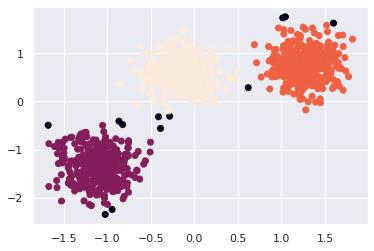

In [3]:
# Generación de la data
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Normalización de las variables
X = StandardScaler().fit_transform(X)

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

Los **puntos negros** corresponden a los **outliers** para el resultado anterior.

Tenga en cuenta que **no es necesario especificar el número de clústeres** con el algoritmo DBSCAN. Además, DBSCAN es bueno para descubrir los valores atípicos sin requerir algunos trucos como lo hicimos anteriormente para el algoritmo de k-means.

Sin embargo DBSCAN no siempre funciona bien, por ejemplo aumentemos el número de puntos que definen nuestro conjunto de prueba (hasta 5000 como el usado para el ejemplo de k-means).

Número de clusters: 2
Homogeneity: 0.5779851468789232
Completeness: 0.9879288809412908
Mean Silhouette score: 0.5790844573923847


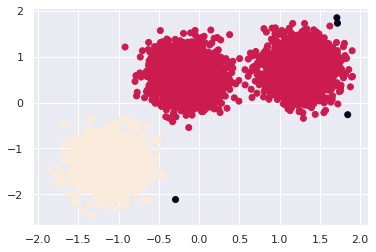

In [4]:
# Generación de la data
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Normalización de las variables
X = StandardScaler().fit_transform(X)

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

Podemos observar que DBSCAN solo logra determinar (en esta configuración de hiperparámetros del modelo) solo 2 clusters de los 3 que intuitivamente somos capaces de determinar.

Para solucionar este problema debemos trabajar con los hiperparámetros del modelo, en este caso **eps** y **min_samples** (MinPts).

Número de clusters: 3
Homogeneity: 0.9844276662916477
Completeness: 0.94396783221913
Mean Silhouette score: 0.6760000825687682


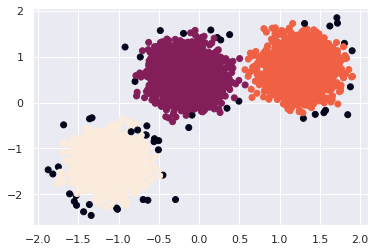

In [5]:
# Generación de la data
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Normalización de las variables
X = StandardScaler().fit_transform(X)

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.12, min_samples=5).fit_predict(X)

# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

Con esta configuración de hiperparámetros es posible encontrar un resultado más cercano, en el cual es posible identificar los 3 clusters.

Otro ejemplo: Probemos DBSCAN con el dataset lunas que tantos problemas genera para el algoritmo k-Means.

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400, noise=0.05, random_state=0)

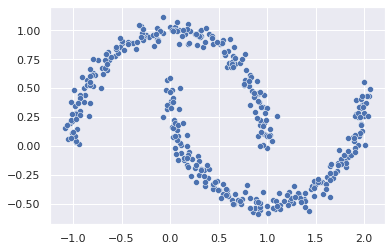

In [7]:
x = X[:, 0]
y = X[:, 1]
sns.scatterplot(x, y, legend = False);

In [12]:
model = DBSCAN(eps = 0.3)
clusters = model.fit_predict(X)

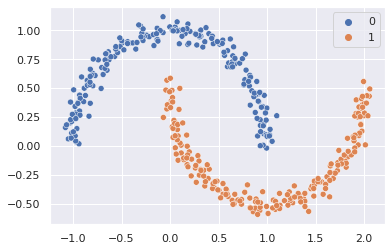

In [13]:
sns.scatterplot(x, y, hue = clusters);

## <font color='green'>Actividad 1</font>

Considere el siguiente conjunto de datos no esféricos:

```
# Generación de data no esférica.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)
```

1. Implemente un modelo DBSCAN para agrupar sus datos (recuerde los pasos metoddológicos necesarios para implementar un buen modelo). Calcule las siguientes métricas: i) número de clusters, ii) homogeneidad, iii) completitud y iv) mean silhouette score.

2. Repita el proceso implementando un algoritmo k-means.

3. Grafique la salida de ambos modelos y comente sus resultados.



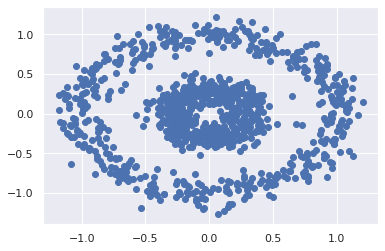

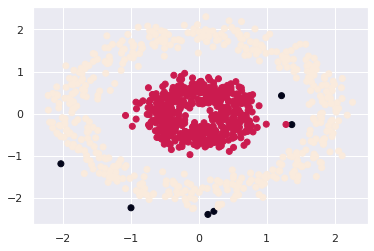

Número de clusters: 2
Homogeneity: 0.9895900789402434
Completeness: 0.9452858228042225
Mean Silhouette score: 0.177304847604998


In [44]:
# Generación de data no esférica.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

#plotear
plt.scatter(X[:,0], X[:,1])
plt.show()

# Normalización de las variables
X = StandardScaler().fit_transform(X)

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))


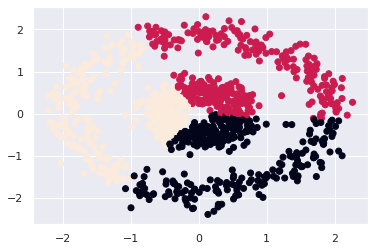

In [47]:
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170)
kmeans.fit(X)

y_pred2 = kmeans.predict(X)

# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=y_pred2)
plt.show()

In [48]:
# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred2[np.where(y_pred2 != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred2)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred2)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred2)))

Número de clusters: 3
Homogeneity: 1.7434646382964012e-05
Completeness: 1.1000556908112663e-05
Mean Silhouette score: 0.31696154918369107


<font color='green'>Fin Actividad 1</font>


## <font color='blue'>**Parámetros DBSCAN**</font>

DBSCAN tiene algunos parámetros y de ellos, dos son cruciales: eps y MinPts.

Eps es la distancia más lejana a la que un punto seleccionará a sus vecinos. MinPts se refiere al número de puntos vecinos necesarios para que un punto se considere una región densa o un grupo válido. Por lo general, MinPts se establece en un valor que tenga sentido para el conjunto de datos y el número de dimensiones presentes. Esto determinará el número de valores atípicos identificados. Sin embargo, este parámetro no es tan crucial como eps.

**El parámetro más importante de DBSCAN es eps**. Como indicamos previamente es la distancia más lejana a la que un punto seleccionará a sus vecinos. Por tanto, esto decidirá intuitivamente cuántos vecinos descubrirá un punto. Esto dependerá de la distribución de los datos en sí.


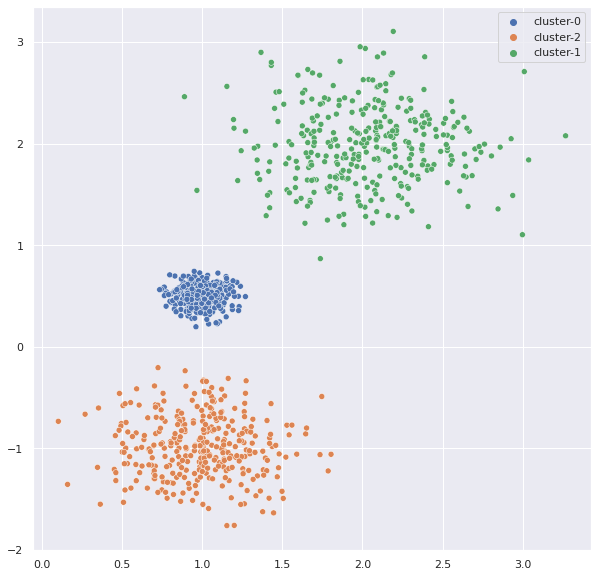

In [49]:
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

Hagamos DBSCAN con algunos valores para nuestro conjunto de datos.

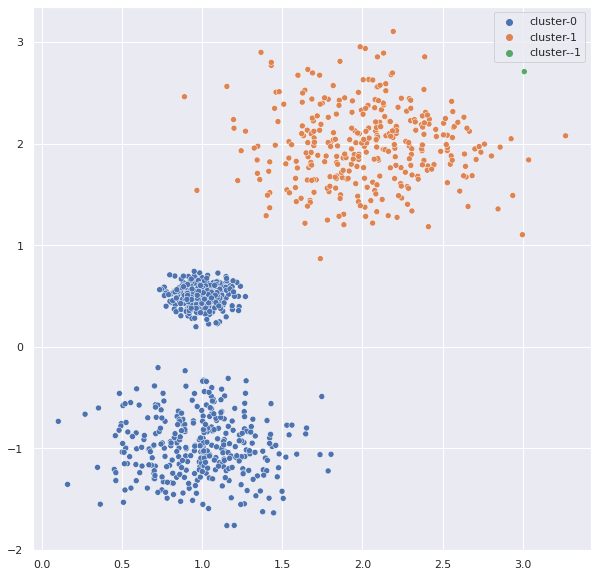

In [50]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])

Podemos ver claramente en nuestra última figura que dos grupos se han fusionado.Estas situaciones pueden producir problemas en una aplicación de agrupación en problemas reales. 

Variaremos el valor de eps para ver su efecto sobre los clusters.

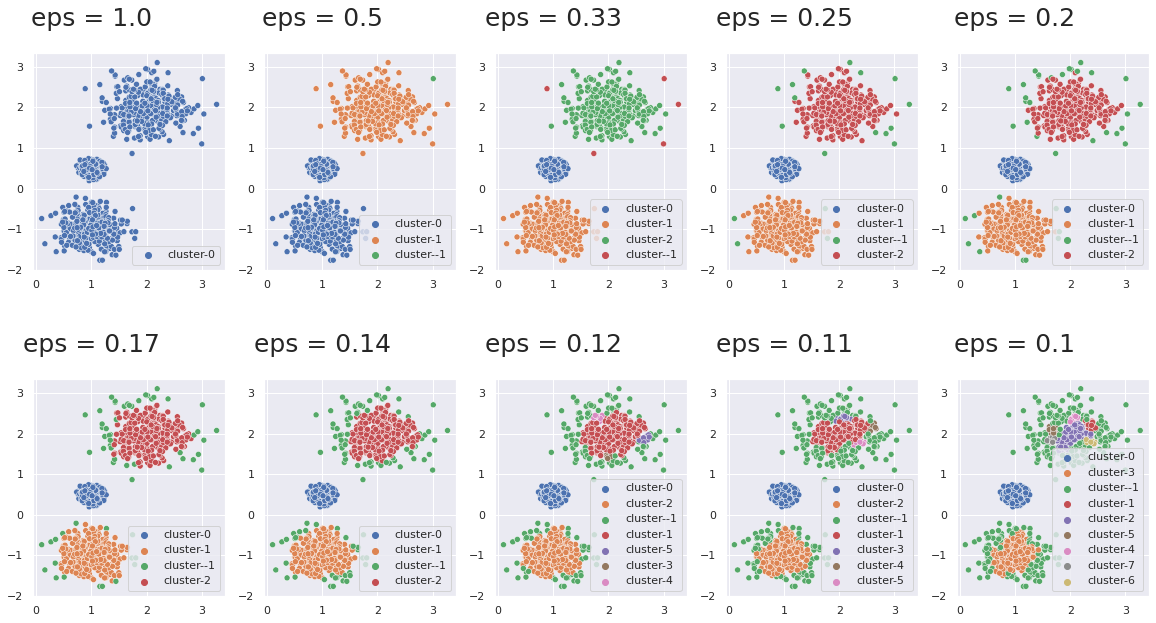

In [51]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

Podemos ver que alcanzamos un punto óptimo entre eps = 0.1 y eps = 0.33. Los valores de eps más pequeños tienen demasiado ruido o valores atípicos (se muestran en color verde).

## <font color='blue'>**Método para el tuning del parámetro eps**</font>

Dado que el valor de eps es proporcional al número esperado de vecinos descubiertos, podemos usar los vecinos más cercanos (KNN) para encontrar una estimación buena para el eps. Calculemos los vecinos más cercanos.

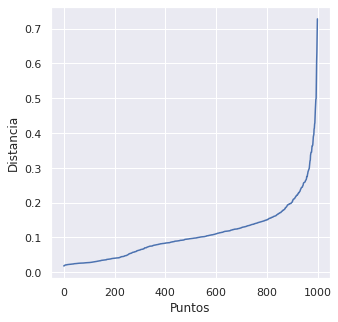

In [52]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.savefig("Distance_curve.png", dpi=300)

In [74]:
X

array([[ 0.8951447 ,  0.35799821],
       [ 1.17640523,  0.54001572],
       [ 0.85126135, -0.63502669],
       ...,
       [ 2.24284467,  1.58073184],
       [ 2.65263897,  2.15110367],
       [ 0.70827913, -0.59613368]])

Note que en el cálculo del vecino más cercano, el punto en sí aparecerá como el primer vecino más cercano. Entonces buscamos los 11 vecinos más cercanos. Ordenamos la distancia al décimo vecino más cercano y graficamos la variación de la distancia. Como podemos ver, el **punto de codo** aparece en algún lugar entre 0,1 y 0,3. Muy parecido al resultados que encontramos gráficamente al explorar los datos.

Ville Satopaa et al. presentaron el paper “Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior” en el año 2011. En este artículo, se presenta una forma de detectar el punto de codo (elbow point).

In [53]:
pip install kneed

0.18723454491446345


<Figure size 360x360 with 0 Axes>

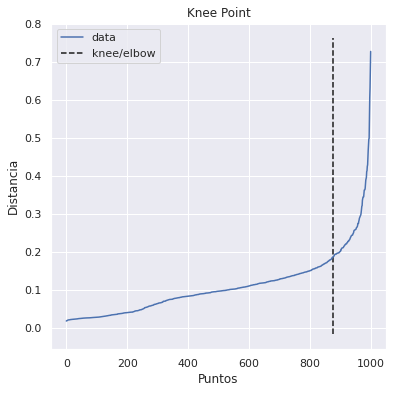

In [54]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancia")

print(distances[knee.knee])

Podemos ver que el punto de inflexión detectado por este método tiene un valor de 0.187. Ahora podemos usar este valor como nuestro eps para ver cómo se vería nuestro nuevo agrupamiento.

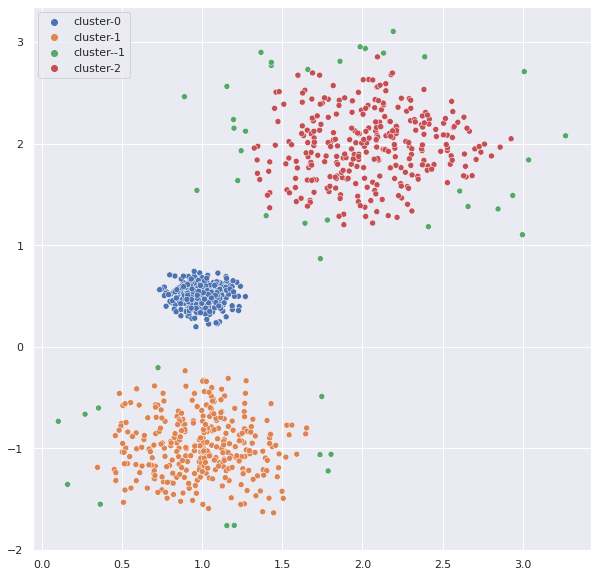

In [55]:
db = DBSCAN(eps=0.187, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])

Podemos ver que tenemos una estimación razonable de la agrupación real. Esto suele ser suficiente para el trabajo de investigación. Si la inexistencia de valores atípicos es una suposición intuitiva para el escenario, uno puede simplemente usar los vecinos más cercanos calculados para reasignar los puntos atípicos (denominados como grupo - 1) a los grupos detectados.

Hay algunas suposiciones implícitas en este enfoque:

* Las densidades en todos los grupos son las mismas.
* Los tamaños de los conglomerados o las desviaciones estándar son los mismos.

Estas suposiciones están implícitas cuando consideramos el mismo nivel de vecino para el cálculo del punto de codo. Sin embargo, en los datos originales, podemos ver claramente que las densidades no son las mismas. Esta es la razón principal por la que observamos algunos valores atípicos a pesar de que los puntos se distribuyen utilizando una desviación estándar fija.

## <font color='green'>Actividad 2</font>

A continuación se presenta un código que permite graficar una muestra de datos 2D generados a partir de una distribución uniforme.

El código además permite explorar en forma interactiva los parámetros eps y min_samples (MinPts) del algoritmo DBSCAN.

```
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
from ipywidgets import interact, widgets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# Creamos datos 2D ficticios tomando muestras de una distribución uniforme  
data_matr = np.random.rand(200, 2)

# Calcular los márgenes para plotear los resultados
x_min, y_min = data_matr.min(axis=0)
x_max, y_max = data_matr.max(axis=0)
x_margin = (x_max - x_min) * 0.1
y_margin = (y_max - y_min) * 0.1

def render_glyphs(data_matr, int_glyphs, ax):
    """Crear un scatter plot dada una matriz 2D y matplotlib.Axes."""
    for (x, y), g in zip(data_matr, int_glyphs):
        is_noise = g < 0
        ax.text(x, y, str(g), alpha=0.5 if is_noise else 1.0)

def update_dbscan_plot(eps, min_pts):
    """Cluster `data_matr` y generar una gráfica de las etiquetas del cluster."""
    
    # DBSCAN
    dist_matr = euclidean_distances(data_matr)
    dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='precomputed',
               algorithm='auto', leaf_size=30, p=None, n_jobs=1)
    dbscan.fit(dist_matr)
    
    # Generar gráficos
    fig, ax = plt.subplots()
    render_glyphs(data_matr, dbscan.labels_, ax)
    ax.set_xlim(x_min - x_margin, x_max + x_margin)
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Cluster number')

# Exploración interactiva de DBSCAN 
interact(update_dbscan_plot, 
         eps=widgets.FloatSlider(value=0.03, min=1e-10, max=0.4, step=0.005, readout_format='.3f'),
         min_pts=widgets.IntSlider(value=3, min=2, max=15, step=1, readout_format='d'));
```
1. Interctúe con los parámetros del modelo y estime cuál sería el mejor seteo de hiperparámetros propuestos para esta muestra de datos.

2. Utilice el método de Ville Satopaa et al. para encontrar el punto de codo para obtener los mejores resultados de distribución para esta muestra de datos. Grafique sus resultados y compare con los resultados que encontró en el punto 1 al realizar el análisis visual.

In [64]:
# cargar librerias
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
from ipywidgets import interact, widgets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

In [59]:
# Creamos datos 2D ficticios tomando muestras de una distribución uniforme  
data_matr = np.random.rand(200, 2)
data_matr[0:10]

array([[0.07091379, 0.95334642],
       [0.45002715, 0.49963689],
       [0.18339417, 0.82509579],
       [0.82436514, 0.44451864],
       [0.88340825, 0.48134513],
       [0.96435531, 0.89794108],
       [0.59582216, 0.21952137],
       [0.92315783, 0.92671448],
       [0.32738344, 0.60794697],
       [0.97460876, 0.54581424]])

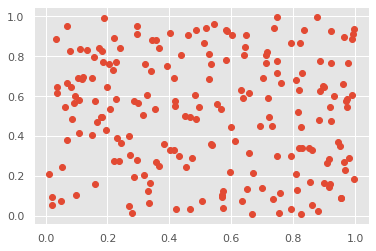

In [71]:
plt.plot(data_matr[:,0], data_matr[:,1], 'o')
plt.show()

In [60]:
# Calcular los márgenes para plotear los resultados
x_min, y_min = data_matr.min(axis=0)
x_max, y_max = data_matr.max(axis=0)
x_margin = (x_max - x_min) * 0.1
y_margin = (y_max - y_min) * 0.1

In [72]:
# definición funciones

def render_glyphs(data_matr, int_glyphs, ax):
    """Crear un scatter plot dada una matriz 2D y matplotlib.Axes."""
    for (x, y), g in zip(data_matr, int_glyphs):
        is_noise = g < 0
        ax.text(x, y, str(g), alpha=0.5 if is_noise else 1.0)

def update_dbscan_plot(eps, min_pts):
    """Cluster `data_matr` y generar una gráfica de las etiquetas del cluster."""

    # DBSCAN
    dist_matr = euclidean_distances(data_matr)
    dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='precomputed',
               algorithm='auto', leaf_size=30, p=None, n_jobs=1)
    dbscan.fit(dist_matr)

    # Generar gráficos
    fig, ax = plt.subplots()
    render_glyphs(data_matr, dbscan.labels_, ax)
    ax.set_xlim(x_min - x_margin, x_max + x_margin)
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Cluster number')

In [73]:
# Exploración interactiva de DBSCAN 
interact(update_dbscan_plot, 
         eps=widgets.FloatSlider(value=0.03, min=1e-10, max=0.4, step=0.005, readout_format='.3f'),
         min_pts=widgets.IntSlider(value=3, min=2, max=15, step=1, readout_format='d'));

interactive(children=(FloatSlider(value=0.03, description='eps', max=0.4, min=1e-10, readout_format='.3f', ste…

Text(0, 0.5, 'Distancia')

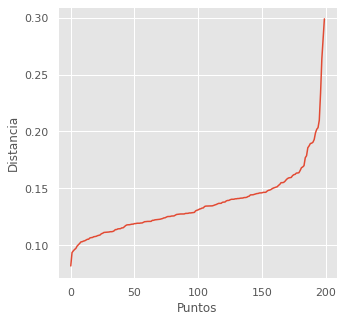

In [92]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_matr)
distances, indices = neighbors.kneighbors(data_matr)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
# plt.savefig("Distance_curve.png", dpi=300)

0.1618194268580478


<Figure size 360x360 with 0 Axes>

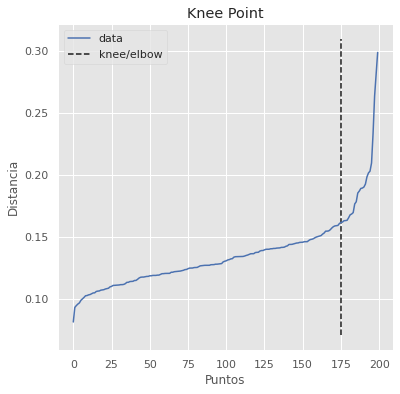

In [76]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancia")

print(distances[knee.knee])

In [77]:
eps_opt = distances[knee.knee]
eps_opt

0.1618194268580478

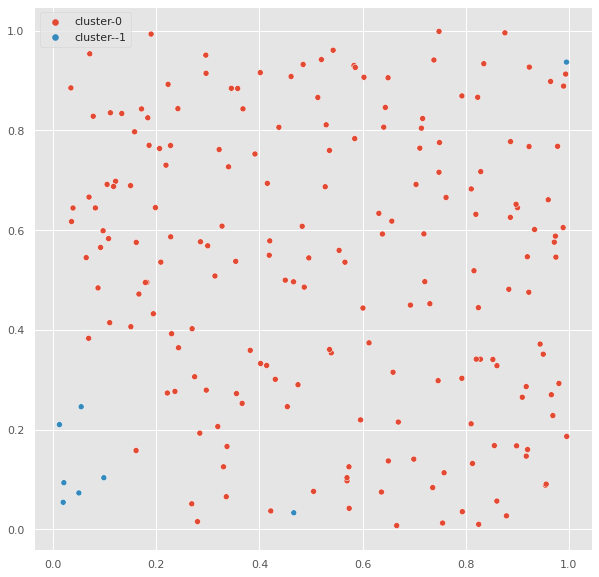

In [90]:
# db = DBSCAN(eps=eps_opt).fit(data_matr)
db = DBSCAN(eps=eps_opt, min_samples=14).fit(data_matr)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data_matr[:,0], data_matr[:,1], hue=["cluster-{}".format(x) for x in labels])

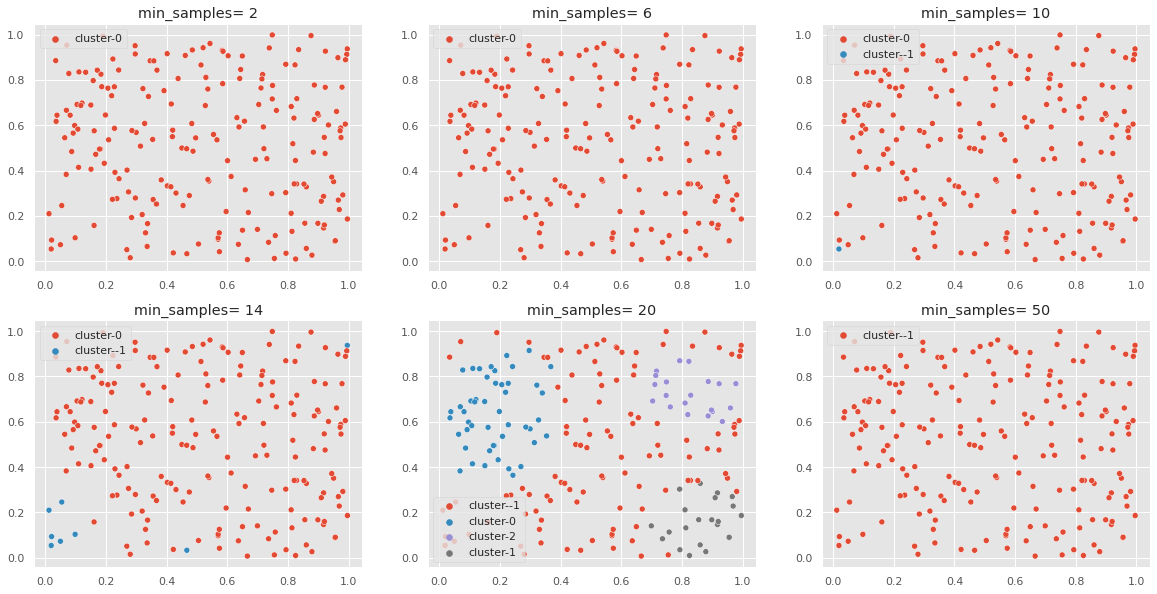

In [86]:
count = 0
plt.figure(figsize=(20, 10))

for min_spl in [2, 6, 10, 14, 20, 50]: 

  db = DBSCAN(eps=eps_opt, min_samples=min_spl).fit(data_matr)
  labels = db.labels_

  count += 1
  ax = plt.subplot(2,3,count)
  sns.scatterplot(data_matr[:,0], data_matr[:,1], hue=["cluster-{}".format(x) for x in labels], ax = ax)
  plt.title(f'min_samples= {min_spl}')



<font color='green'>Fin Actividad 2</font>


## <font color='green'>Actividad 3</font>

El archivo multishape.csv contiene una muestra de datos. Aplicar el algoritmo DBSCAN sobre los datos del archivo.

1. Calcular las métricas de calidad de clusters: de homogeneidad, completitud, y mean silhouette score.

2. Seleccionar los mejores parámetros (eps, min_sample) según los puntajes de calidad del clúster.

3. Utilice el algoritmo de punto codo para encontrar sus hiperparámetros. Compare con los resultados del punto 3.


In [93]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
path = '/content/drive/MyDrive/06_AprendizajeNoSupervisado/Files/'

In [96]:
data = pd.read_csv(path+'multishape.csv')
data.head(5)

,x,y,shape
0,-0.803739,-0.853053,1
1,0.852851,0.367618,1
2,0.927180,-0.274902,1
3,-0.752626,-0.511565,1
4,0.706846,0.810679,1


In [98]:
data['shape'].unique()

array([1, 2, 3, 4, 5, 6])

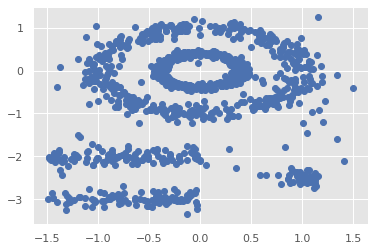

In [101]:
plt.plot(data['x'], data['y'], 'bo')

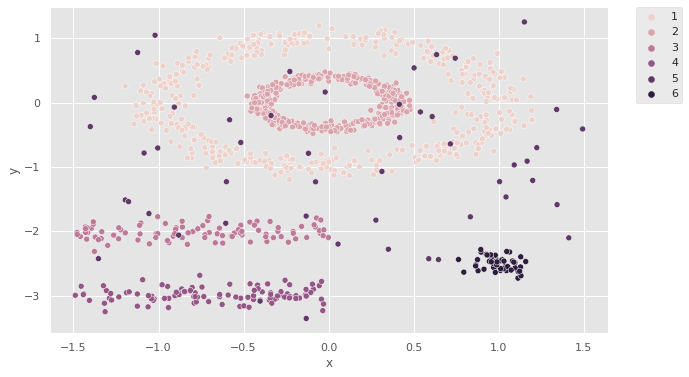

In [113]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data, hue = 'shape', x = 'x', y = 'y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

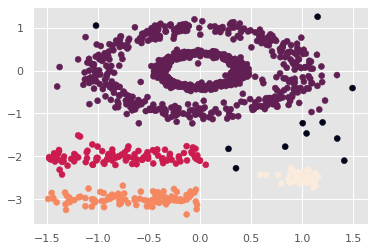

In [118]:
# create X matrix
X_mtx = []
count = 0
for i in range(len(data['x'])):
  #print(i)
  X_mtx.append([data['x'][i], data['y'][i]])
  #X_mtx[i,1] = data['y'][i]
  #count += 1

X_mtx[0:5]
# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X_mtx)

# Graficar las predicciones
# data['x'], data['y'], 'bo')
plt.scatter(data['x'], data['y'], c=y_pred)
plt.show()


In [120]:
# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(data['y'], y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(data['y'], y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X_mtx, y_pred)))

Número de clusters: 4
Homogeneity: 0.12182828512770053
Completeness: 0.9999999999999996
Mean Silhouette score: 0.46828639341146194


Text(0, 0.5, 'Distancia')

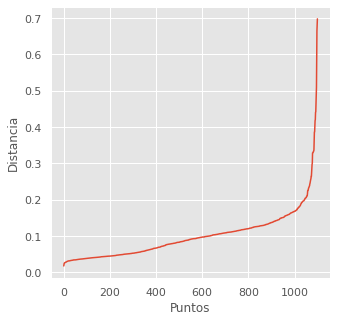

In [146]:
#seleccionar los mejores hiperparametros --> buscar que el ocho tiene sentido

#iterar con vecinos cercanos
n_vecinos = 8
nearest_neighbors = NearestNeighbors(n_neighbors=n_vecinos)
neighbors = nearest_neighbors.fit(X_mtx)
distances, indices = neighbors.kneighbors(X_mtx)
distances = np.sort(distances[:,n_vecinos-1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
# plt.savefig("Distance_curve.png", dpi=300)

0.15920703768205374


<Figure size 360x360 with 0 Axes>

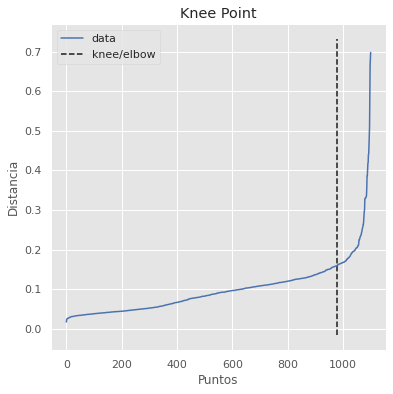

In [147]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancia")

print(distances[knee.knee])

In [148]:
eps_opt = distances[knee.knee]
eps_opt

0.15920703768205374

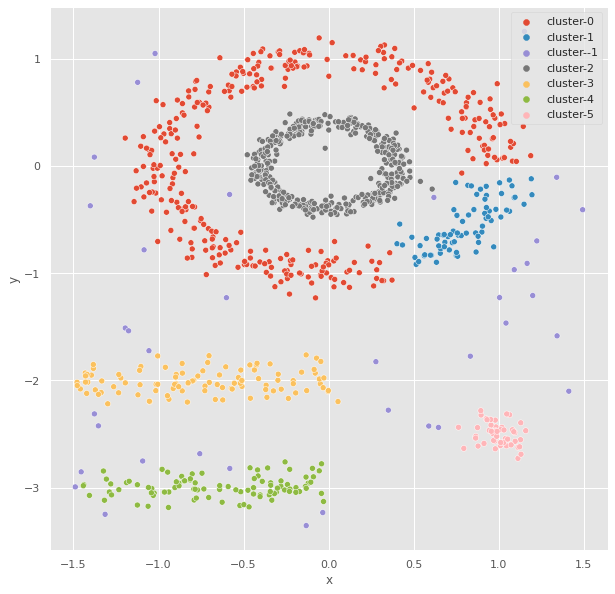

In [137]:
# db = DBSCAN(eps=eps_opt).fit(data_matr)
db = DBSCAN(eps=eps_opt, min_samples=8).fit(X_mtx)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data['x'], data['y'], hue=["cluster-{}".format(x) for x in labels])

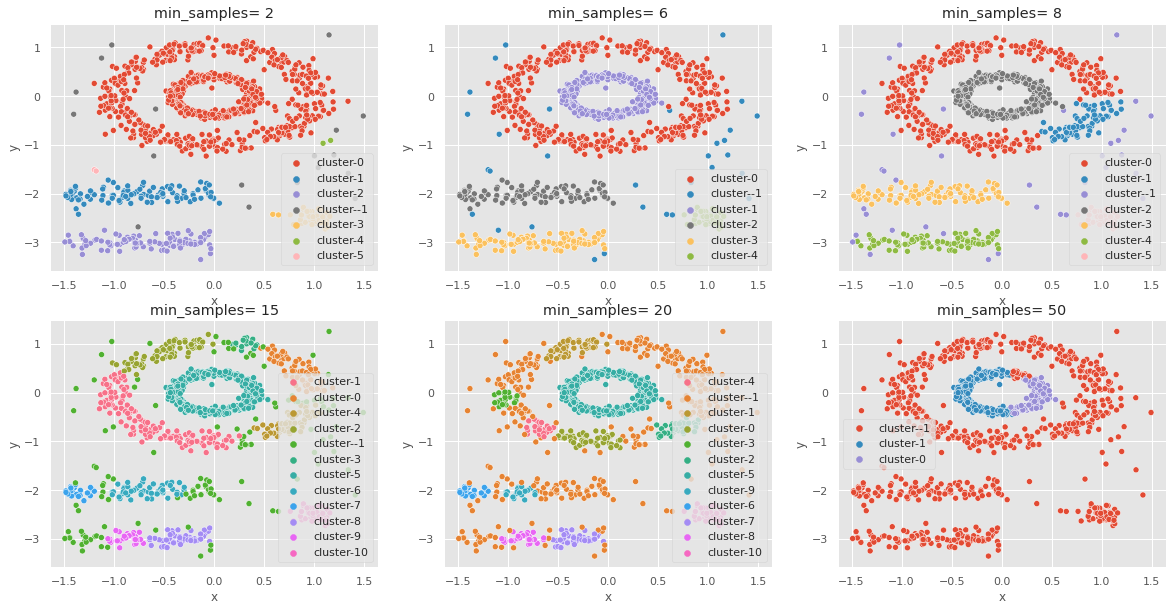

In [138]:
count = 0
plt.figure(figsize=(20, 10))

for min_spl in [2, 6, 8, 15, 20, 50]: 

  db = DBSCAN(eps=eps_opt, min_samples=min_spl).fit(X_mtx)
  labels = db.labels_

  count += 1
  ax = plt.subplot(2,3,count)
  sns.scatterplot(data['x'], data['y'], hue=["cluster-{}".format(x) for x in labels], ax = ax)
  plt.title(f'min_samples= {min_spl}')


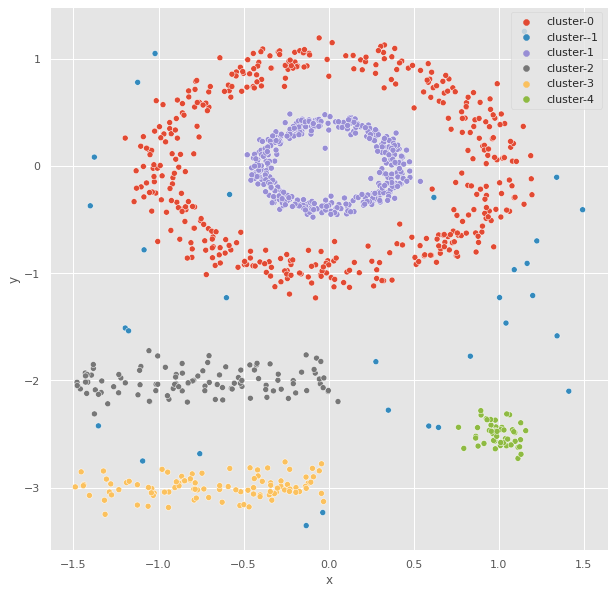

In [151]:
# por lo tanto lo "óptimo" seria:

db = DBSCAN(eps=eps_opt, min_samples=6).fit(X_mtx)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data['x'], data['y'], hue=["cluster-{}".format(x) for x in labels])

y_pred = DBSCAN(eps=eps_opt, min_samples=6).fit_predict(X_mtx)


In [152]:
# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(data['y'], y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(data['y'], y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X_mtx, y_pred)))

Número de clusters: 5
Homogeneity: 0.2022631812534464
Completeness: 0.9999999999999999
Mean Silhouette score: 0.23999194944479751


<font color='green'>Fin Actividad 3</font>
